In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes

In [3]:
user='G'

if user=='S':
    import geopandas as gpd
    mandat_dep=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/liste_mandat.csv")#on récupère le csv de la liste des mandats
    df_depu=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/listeDepute_complete.csv")

if user=='G':
    mandat_dep=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
    df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/listeDepute_complete.csv")


Extraction des dates de début de mandat

In [4]:
debut_mandat=[]
for dates in mandat_dep["Mandat"]:
    dates=str(dates).split()
    debut_mandat.append(' '.join(dates[1:4]))
    
mandat_dep["Debut Mandat"]=np.array(debut_mandat)
mandat_dep.head()

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom,Debut Mandat
0,0,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,Damien Meslot,19 juin 2002
1,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2007
2,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIVe législature,Du 20 juin 2012 au 20 juin 2017,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2012
3,0,Ille-et-Vilaine,La République en Marche,XVe législature (Législature en cours),Depuis le 21 juin 2017 (mandat en cours),Cinquième République - Assemblée nationale,Christine Cloarec-Le Nabour,le 21 juin
4,0,Ardèche,Socialiste,XIe législature,Du 1er juin 1997 au 18 juin 2002,Cinquième République - Assemblée nationale,Pascal Terrasse,1er juin 1997


<b> TRANSTYPAGE !!! (Je suis heureux que ça ait marché) 

In [5]:
df_depu[["Nom","Né le"]].head(2)
mandat_dep[["Nom","Debut Mandat"]].head(2)
age_dep=mandat_dep.set_index('Nom').join(df_depu[["Nom","Né le"]].set_index('Nom'), on='Nom')
mandat_dep.reset_index()
mois={'janvier':1,'février':2, 'mars':3, 'avril':4, 'mai':5, 'juin':6, 'juillet':7, 'août':8, 'septembre':9, 'octobre':10, 'novembre':11, 'décembre':12}
def transtype_date(x):
    x=str(x)        
    date_texte=x.split() 
    if len(date_texte)>1 :
        if  date_texte[1] in (mois.keys()):
            if date_texte[0]=="1er":
                date_texte[0]='1'
            date_texte[1]=str(mois[date_texte[1]])
            date_nombre='/'.join(date_texte)
            return pd.to_datetime(date_nombre)
    else:
        return pd.NaT


age_dep["Date de naissance"]=age_dep["Né le"].apply(lambda x: transtype_date(x))
age_dep["Date debut mandat"]=age_dep["Debut Mandat"].apply(lambda x: transtype_date(x))
age_dep.head(2)

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Debut Mandat,Né le,Date de naissance,Date debut mandat
Nom,,,,,,,,,,
Damien Meslot,0,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,19 juin 2002,11 novembre 1964,1964-11-11,2002-06-19
Damien Meslot,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,20 juin 2007,11 novembre 1964,1964-11-11,2007-06-20


In [6]:
age_dep['age depute']=age_dep['Date debut mandat']-age_dep['Date de naissance']#on crée la variable age au debut du mandat, en jour
age_dep['age en année']=age_dep['age depute'].apply(lambda x: float(x.days / 365.25))#et on la transforme en années
age_dep=age_dep[['Département','Groupe', 'Législature', 'Mandat', 'Régime politique', 'age en année','Date debut mandat']]

In [6]:
mandat_dep.count()#on vérifie qu'il n'y a pas trop de manques

Unnamed: 0          36128
Département         35931
Groupe              32005
Législature         36128
Mandat              36128
Régime politique    36126
Nom                 36128
Debut Mandat        36128
dtype: int64

In [7]:
dep_possible=list(mandat_dep['Département'].unique())#une liste de tous les départements
dep_possible.remove(" Département d'élection inconnu")
dep_possible.remove(np.nan)

Construction d'un tableau des caractérstiques des départements

On peut construire un tableau des départements sans grave problème méthodologique car ils ont peu changé depuis leur création sous le Premier Empire (certains ont seulement été rajouté ou enlevé au cours d'annexions ou de rattachement à d'autres pays : ils sont faciles à isoler).

In [8]:
df=age_dep.reset_index()
w,x,y,z=[],[],[],[]
for dep in dep_possible :
    w+=[df[df['Département']==dep]['age en année'].mean()]#on prend la moyenne d'age dans le département
    x+=[len(df[df['Département']==dep])]#on compte le nombre total de mandat dans le département
    y+=[len(df[df['Département']==dep]['Nom'].unique())]#Puis le nombre de députés différent par dpt
    z+=[x[-1]/y[-1]] #Ceci est le nombre moyen de mandat par député
    
carac_dep_bis=np.array([w, x, y, z])#on crée un dataframe avec les informations
table_depmt = pd.DataFrame(carac_dep_bis, index=['age moyen des deputes', 'nombre_mandat', 'nombre député','nombre moyen de mandats par député'],columns=dep_possible)
table_depmt.head()


,Territoire-de-Belfort,Ille-et-Vilaine,Ardèche,Hauts-de-Seine,La Réunion,Puy-de-Dôme,Essonne,Haut-Rhin,Haute-Marne,Hautes-Pyrénées,...,Départements de l'Empire français aujourd'hui en Belgique,Mont-Blanc,Départements de l'Empire français aujourd'hui aux Pays-Bas,Départements de l'Empire français aujourd'hui en Allemagne,Saint-Domingue,Etranger,Départements de l'Empire français aujourd'hui en Suisse,Rhône-et-Loire,Départements de l'Empire français aujourd'hui au Luxembourg,Ile-de-France (Maurice)
age moyen des deputes,46.976129,47.333331,52.584768,54.076791,47.356341,49.266955,47.782325,49.510650,49.614406,47.610409,...,44.775862,43.130094,48.834702,51.882537,35.140657,38.944559,44.386286,36.502179,49.342574,38.561259
nombre_mandat,64.000000,572.000000,331.000000,184.000000,139.000000,475.000000,92.000000,325.000000,208.000000,251.000000,...,98.000000,48.000000,27.000000,31.000000,20.000000,2.000000,11.000000,20.000000,8.000000,2.000000
nombre député,27.000000,216.000000,132.000000,67.000000,50.000000,209.000000,38.000000,157.000000,94.000000,103.000000,...,83.000000,34.000000,26.000000,31.000000,15.000000,2.000000,10.000000,17.000000,7.000000,2.000000
nombre moyen de mandats par député,2.370370,2.648148,2.507576,2.746269,2.780000,2.272727,2.421053,2.070064,2.212766,2.436893,...,1.180723,1.411765,1.038462,1.000000,1.333333,1.000000,1.100000,1.176471,1.142857,1.000000


In [9]:
print(min(table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]))
print(max(table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]))
print((table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]).mean())
print((table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']<2][table_depmt.loc['nombre député']>40]).count())

1.0
3.09375
2.290677795052528
5


In [10]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']<2][table_depmt.loc['nombre député']>40]

 Allier                                                       1.974843
 Anciens départements d'Algérie                               1.526570
 Meurthe                                                      1.986486
 Départements de l'Empire français aujourd'hui en Italie      1.000000
 Départements de l'Empire français aujourd'hui en Belgique    1.180723
Name: nombre moyen de mandats par député, dtype: float64

Les valeurs les plus basses sont constituées par des départements qui ont appartenu peu de temps à la France, et où les occasions de se faire réélire ont donc été peu nombreuses.

In [11]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']>2.5][table_depmt.loc['nombre député']>40]

 Ille-et-Vilaine       2.648148
 Ardèche               2.507576
 Hauts-de-Seine        2.746269
 La Réunion            2.780000
 Alpes-Maritimes       2.570000
 Oise                  2.611111
 Meurthe-et-Moselle    2.567308
 Charente-Maritime     2.533333
 Indre-et-Loire        2.511450
 Landes                2.548077
 Manche                2.627119
 Seine-St-Denis        2.622642
 Loire-Atlantique      2.589286
 Orne                  2.510949
 Val-de-Marne          2.770833
 Savoie                3.093750
 Haute-Savoie          2.827586
 Tarn-et-Garonne       2.523810
Name: nombre moyen de mandats par député, dtype: float64

Au contraire, les départements où il y a le plus de réélections ne semblent pas avoir de problèmes de ce type.

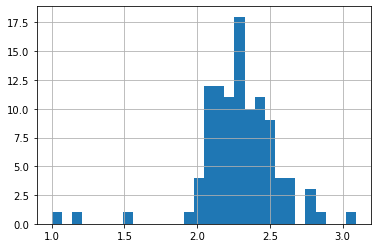

In [12]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40].hist(bins=30)

Construction des cartes de ces caractéristiques

In [13]:
#récupération d'une carte des départements français
import requests
import tempfile
import zipfile


In [14]:
temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname =temporary_location, destname = "borders"):#fonction qui dézippe
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref: 
        zip_ref.extractall(dirname + '/' + destname)
download_unzip('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')#l'URL où on trouve les départements

Cette carte est issue de :"© les contributeurs d'OpenStreetMap sous licence ODbL"

In [15]:
carte_departement = gpd.read_file(tempfile.gettempdir() + "/borders/departements-20140306-100m.dbf")#on va chercher le fichier là où on l'a stocké
carte_metrop = carte_departement.loc[0:95]#on enlève les départements d'outre-mer pour avoir une carte lisible


NameError: name 'gpd' is not defined

In [16]:
table_depmt.columns=[i[1:] for i in table_depmt.columns]#on enlève l'espace devant le nom des départements

In [17]:
carte_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases

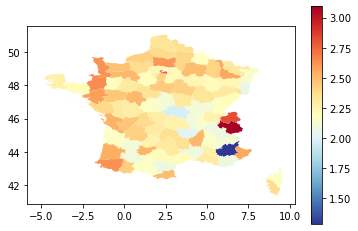

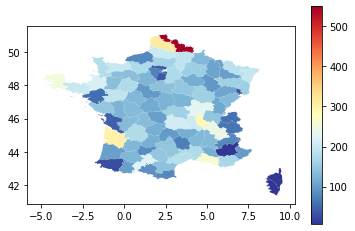

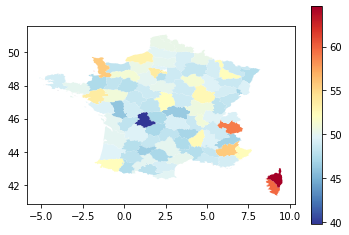

In [18]:
df = carte_metrop.merge(table_depmt.T, how = 'inner', left_index=True, right_index=True)#on transpose table pour avoir les départements en noms de lignes
df.plot(column = 'nombre moyen de mandats par député', cmap = 'RdYlBu_r', legend=True)#on crée des cartes
df.plot(column='nombre député', cmap = 'RdYlBu_r', legend=True)
df.plot(column='age moyen des deputes', cmap='RdYlBu_r', legend=True)

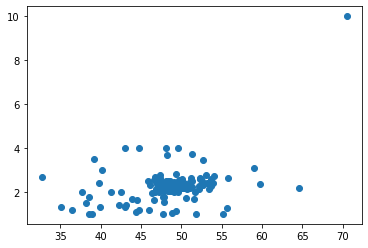

In [16]:
#C'était juste pour voir ^^
bubu=table_depmt.T.reset_index()[["age moyen des deputes","nombre moyen de mandats par député"]]
plt.scatter(bubu["age moyen des deputes"],bubu["nombre moyen de mandats par député"])

On s'occupe des régimes maintenant

In [17]:
import urllib#pour récupérer les données
import bs4#pour rendre lisibles les données
import re
def Scrap (url):
    req = urllib.request.Request(url)
    html = urllib.request.urlopen(req).read()
    page = bs4.BeautifulSoup(html, "lxml")
    return page
def ToDf (table) :
    Listgrossiere=pd.read_html(str(table))#on transforme le tableau en liste de dataframes
    listeDf=Listgrossiere[0]#on récupère le dataframe
    return listeDf
page=Scrap('https://fr.wikipedia.org/wiki/Liste_des_r%C3%A9gimes_fran%C3%A7ais')
table = page.find('table')#on récupère le seul tableau de la page qui liste des députés
listeReg=ToDf(table)

In [18]:
listeReg2=pd.DataFrame(np.array([listeReg[('Nom','Nom')],listeReg[('Date','Date')]]).T,columns=["Nom","Date"])#on s'occupe des doubles index du tableau de wikipedia
lstRegime=listeReg2[16:]#on enlève les lignes correspondants aux régimes trop anciens

In [19]:
debut_regime=[]
import datetime#on importe la date du jour
maintenant=pd.to_datetime(str(datetime.datetime.now().year)+'/'+str(datetime.datetime.now().month)+'/'+str(datetime.datetime.now().day))
def extraire_date_1(x, Debut=True):
    dates=str(x)
    dates=str(dates).split()
    if Debut:
        dates=' '.join(dates[1:4])
    else:
        dates=' '.join(dates[5:])
    return transtype_date(dates)
    
    
lstRegime['Date2']=lstRegime['Date'].apply(lambda x : extraire_date_1(x))
lstRegime['Date3']=lstRegime['Date'].apply(lambda x : extraire_date_1(x,Debut=False))
lstRegime['Date3'][lstRegime['Nom']=='Cinquième République']=maintenant
lstRegime['Durée']=lstRegime['Date3']-lstRegime['Date2']
lstRegime['Durée en année']=lstRegime['Durée'].apply(lambda x: float(x.days / 365.25))

<ipython-input-19-7d23569cfb6f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstRegime['Date2']=lstRegime['Date'].apply(lambda x : extraire_date_1(x))
<ipython-input-19-7d23569cfb6f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstRegime['Date3']=lstRegime['Date'].apply(lambda x : extraire_date_1(x,Debut=False))
<ipython-input-19-7d23569cfb6f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [20]:
lstRegime=lstRegime[~lstRegime["Date2"].isna()].drop_duplicates()
lstRegime=lstRegime.reset_index().drop(['index'], axis=1)#on enlève l'ancien index des régimes
lstRegime=lstRegime.set_index('Date2', drop=False)#et on le remplace par sa date du début : il est dans l'ordre chronologique

In [21]:
Regime_depute=age_dep.reset_index()####J'ai l'impression que cette case ne sert à rien
Regime_depute=Regime_depute[Regime_depute["Date debut mandat"] >= lstRegime["Date2"][0]]
print(Regime_depute["Date debut mandat"][1]>lstRegime['Date2'][0])#on vérifie que les dates de fin sont supérieures à celles de début

True


In [22]:
def TrouverRegime(x):
    regime=lstRegime['Nom'][0]
    i=0    
    while (not (x<lstRegime['Date3'][i])) and i<=11:#jusqu'à ce que l'on trouve le premier régime ayant commencé après l'élection 
        i+=1#on essaie avec le suivant
        regime=lstRegime['Nom'][i]
    return regime

In [23]:
Regime_depute["Régime"]=Regime_depute["Date debut mandat"].apply(lambda x : TrouverRegime(x) )

In [24]:
reg_possible=list(Regime_depute['Régime'].unique())#une liste de tous les régimes
reg_possible.reverse()#on les met dans l'ordre chronologique
df=Regime_depute.reset_index()
v,w,x,y,z,a,b,c,d=[],[],[],[],[],[],[],[],[]
for reg in reg_possible :
    v+=[float(lstRegime[lstRegime['Nom']==reg]['Durée en année'])]#la durée du régime
    w+=[df[df['Régime']==reg]['age en année'].mean()]#on prend la moyenne d'age dans ce régime
    x+=[len(df[df['Régime']==reg])]#on compte le nombre total de mandat dans le régime
    y+=[len(df[df['Régime']==reg]['Nom'].unique())]#Puis le nombre de députés différent
    z+=[x[-1]/y[-1]] #Ceci est le nombre moyen de mandat par député
    a+=[x[-1]/v[-1]]#le nombre moyen de mandat par an
    b+=[len(Regime_depute[Regime_depute['Régime']==reg]['Législature'].unique())]
    c+=[x[-1]/b[-1]]#nombre moyen de mandats par législature
    d+=[v[-1]/b[-1]]#durée moyenne d'une législature
    
carac_reg_bis=np.array([v, w, x, y, z, a, b, c, d])#on crée un dataframe avec les informations
table_reg = pd.DataFrame(carac_reg_bis, index=['durée du régime', 'age moyen des deputes', 'nombre_mandat', 'nombre député','nombre moyen de mandats par député', 'nombre moyen de mandats par an', 'nombre de législature', 'nombre moyen de mandats par législature', 'durée moyenne de législature'],columns=reg_possible).T
table_reg



,durée du régime,age moyen des deputes,nombre_mandat,nombre député,nombre moyen de mandats par député,nombre moyen de mandats par an,nombre de législature,nombre moyen de mandats par législature,durée moyenne de législature
Première Restauration,0.791239,51.067422,258.0,240.0,1.075000,326.070934,2.0,129.000000,0.395619
Premier Empire,9.878166,46.797498,468.0,447.0,1.046980,47.377217,2.0,234.000000,4.939083
Cent-Jours,0.298426,47.485411,325.0,314.0,1.035032,1089.048165,1.0,325.000000,0.298426
Seconde Restauration,14.507871,52.205648,2562.0,1417.0,1.808045,176.593791,5.0,512.400000,2.901574
Monarchie de Juillet,17.462012,49.384249,3750.0,1462.0,2.564979,214.751881,7.0,535.714286,2.494573
Deuxième République,3.967146,45.702348,1796.0,1349.0,1.331357,452.718427,2.0,898.000000,1.983573
Second Empire,18.154689,51.336521,1296.0,608.0,2.131579,71.386518,4.0,324.000000,4.538672
Troisième République,70.494182,49.349630,11513.0,4893.0,2.352953,163.318442,17.0,677.235294,4.146717
Gouvernement provisoire de la République française,2.642026,45.263814,1841.0,842.0,2.186461,696.813731,3.0,613.666667,0.880675
Quatrième République,11.452430,48.876792,1385.0,931.0,1.487648,120.935035,5.0,277.000000,2.290486


In [25]:
table_longreg=table_reg[table_reg['durée du régime']>10]

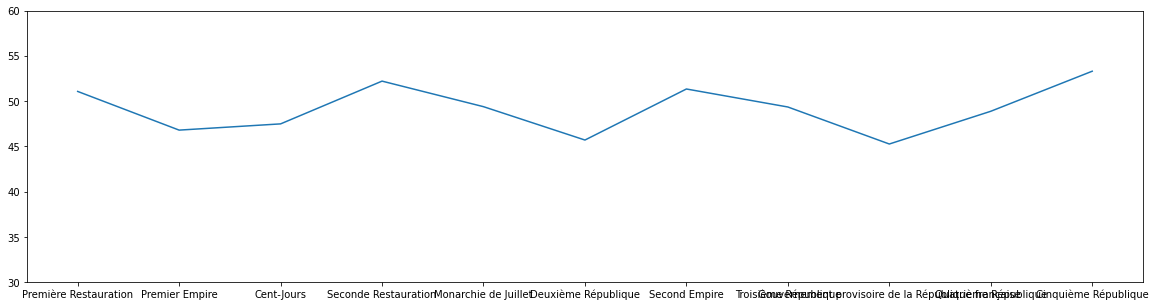

In [26]:
plt.figure(figsize=(20,5))
plt.ylim(bottom=30, top=60)
plt.plot(table_reg["age moyen des deputes"])

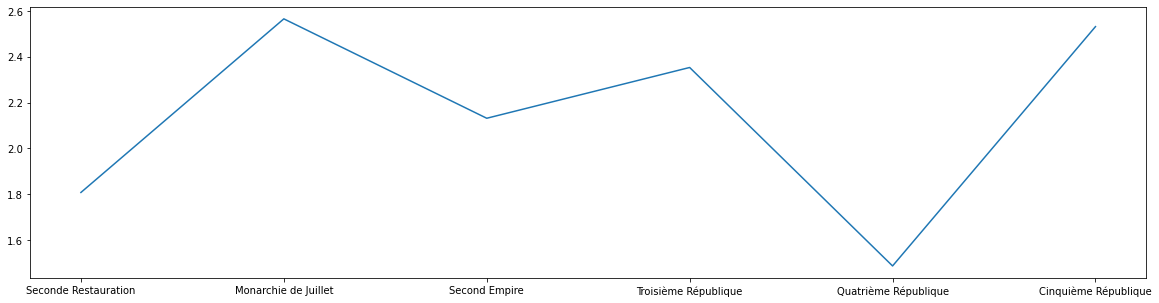

In [27]:
plt.figure(figsize=(20,5))
plt.plot(table_longreg["nombre moyen de mandats par député"])

 
 
 ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
 
 Departement de Naissance, début des stat 
 
 ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo






In [28]:
df_depu["Département de naissance"].count()

15976

In [29]:
df_depu[df_depu["Département de naissance"].isna()].count()
#On va voir si nos données ne sont pas trop biaisée

Unnamed: 0                  524
Nom                         524
Né le                       524
Département de naissance      0
Département de mort          22
dtype: int64

In [30]:
dept_naiss=Regime_depute.set_index('Nom').join(df_depu[["Nom","Né le", "Département de naissance"]].set_index('Nom'), on='Nom')
dept_naiss=dept_naiss.reset_index()
dept_naiss.head()


,Nom,Département,Groupe,Législature,Mandat,Régime politique,age en année,Date debut mandat,Régime,Né le,Département de naissance
0,Damien Meslot,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.601643,2002-06-19,Cinquième République,11 novembre 1964,Inconnu
1,Damien Meslot,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,42.603696,2007-06-20,Cinquième République,11 novembre 1964,Inconnu
2,Damien Meslot,Territoire-de-Belfort,Union pour un mouvement populaire,XIVe législature,Du 20 juin 2012 au 20 juin 2017,Cinquième République - Assemblée nationale,47.605749,2012-06-20,Cinquième République,11 novembre 1964,Inconnu
3,Pascal Terrasse,Ardèche,Socialiste,XIe législature,Du 1er juin 1997 au 18 juin 2002,Cinquième République - Assemblée nationale,32.197125,1997-01-06,Cinquième République,26 octobre 1964,Gard
4,Pascal Terrasse,Ardèche,Socialiste,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.645448,2002-06-19,Cinquième République,26 octobre 1964,Gard


In [34]:
dept_naiss[dept_naiss["Département de naissance"]=="Inconnu"].groupby("Régime").count()['Département de naissance'] / dept_naiss.groupby("Régime").count()['Département de naissance']*100
#En gros, il y a entre 10 et 20% de departement de naissance manquant par régime

Régime
Cent-Jours                                            11.002445
Cinquième République                                  18.358002
Deuxième République                                    6.878307
Gouvernement provisoire de la République française    11.649155
Monarchie de Juillet                                   6.468798
Premier Empire                                        29.522184
Première Restauration                                 10.928962
Quatrième République                                  12.861538
Second Empire                                          9.313725
Seconde Restauration                                  10.434783
Troisième République                                   8.253773
Name: Département de naissance, dtype: float64

Les départements où on a le plus de valeurs manquante sont aussi ceux où il y a le plus de député : l'analyse des valeurs manquantes est à affiner mais nous pensons qu'utiliser ces variables reste possible.

In [31]:
listeLegis=['Ire','IIe', 'IIIe', 'IVe', 'Ve', 'VIe', 'VIIe', 'VIIIe', 'IXe', 'Xe', 'XIe', 'XIIe', 'XIIIe', 'XIVe', 'XVe', 'XVIe']
listeLegislature=[' '+i+' législature ' for i in listeLegis]#on crée une liste des législatures dans le bon ordre

In [32]:
#on va s'intéresser aux législatures des républiques qui ont duré longtemps
dept_naiss_3=dept_naiss[dept_naiss['Régime'] =='Troisième République']
dept_naiss_5=dept_naiss[dept_naiss['Régime'] =='Cinquième République']
dept_naiss_emp2=dept_naiss[dept_naiss['Régime'] =='Second Empire']
diffdep_3=[]#le nombre de députés dans la base pour les législatures i et i+1 pour la Troisième République
diffdep_5=[]#pour la Cinquième
diffdep_emp2=[]#pour le second Empire
[tauxreelec_3,tauxreelec_5, tauxreelec_emp2]=[[],[],[]]#le taux de réelection entre les législatures i et i+1 pour la troisième République
[date_leg_3, date_leg_5,date_leg_emp2]=[[],[],[]]#les dates de début de législatures


def data_legis(compteur, dept_naissance, diffdep, tauxreelec, date_leg):
    passation=pd.concat((dept_naissance[dept_naissance['Législature'] ==listeLegislature[compteur]],dept_naissance[dept_naissance['Législature']==listeLegislature[compteur+1]]))

    if not dept_naissance[dept_naissance['Législature']==listeLegislature[compteur+1]]['Date debut mandat'].empty :#s'il y a deux législatures à comparer :
        nbredep=passation['Nom'].count()
        diffdep+=[nbredep]
        tauxreelec+=[passation['Nom'].unique().shape[0]/nbredep]
        date_leg+=[min(passation.tail(1)['Date debut mandat']).year]
    return diffdep, tauxreelec, date_leg
            
for compteur in range(len(listeLegislature)-1) :
    data_legis(compteur, dept_naiss_3, diffdep_3, tauxreelec_3, date_leg_3)
    data_legis(compteur, dept_naiss_5, diffdep_5, tauxreelec_5, date_leg_5)
    data_legis(compteur, dept_naiss_emp2, diffdep_emp2, tauxreelec_emp2, date_leg_emp2)

print(diffdep_5)#on a une bonne base jusqu'à la douzième législature pour la 5e République, avec une grande majorité des députés présents dans la base       

[1470, 1492, 1573, 1555, 1406, 1353, 1411, 1470, 1531, 1426, 1316, 1111, 674, 241]


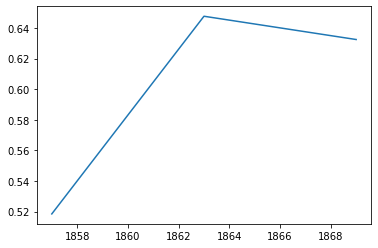

In [33]:
plt.plot(date_leg_emp2,tauxreelec_emp2)

Où on voit l'Empire qui s'embourgeoise...

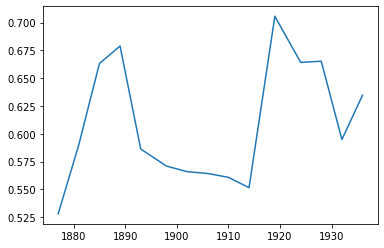

In [34]:
plt.plot(date_leg_3, tauxreelec_3)

On peut voir l'impact de l'affaire Dreyfus et de la Première Guerre Mondiale, et les scandales des années 30.

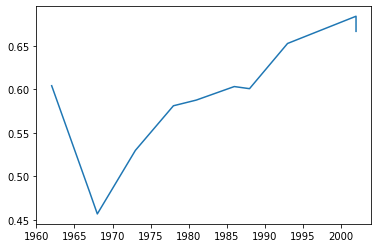

In [39]:
plt.plot(date_leg_5[:11], tauxreelec_5[:11])

On voit un effet mai 68, puis un début de professionnalisation de la politique.  

In [35]:
test=dept_naiss[dept_naiss["Département de naissance"]=="Inconnu"][dept_naiss["Régime"]=="Cinquième République"]
test.head()
y=test[["Nom","Département"]].groupby("Département").count().sort_values(by="Nom")
z=dept_naiss[["Nom","Département"]]
z=z[z["Département"].isin(y.index)]
z=z.groupby("Département").count()
z=z.join(y,on="Département",lsuffix=" en tout")
z["Pourcent"]=z["Nom"]*100/z["Nom en tout"]
print(z[z["Nom en tout"]>80][z["Pourcent"]>10].count())
z[z["Nom en tout"]>80].sort_values(by="Pourcent").tail(5)

<ipython-input-35-9031f348c685>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test=dept_naiss[dept_naiss["Département de naissance"]=="Inconnu"][dept_naiss["Régime"]=="Cinquième République"]


Nom en tout    15
Nom            15
Pourcent       15
dtype: int64


<ipython-input-35-9031f348c685>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(z[z["Nom en tout"]>80][z["Pourcent"]>10].count())


,Nom en tout,Nom,Pourcent
Département,,,
Yvelines,160,50,31.250000
Seine-St-Denis,145,47,32.413793
Val-de-Marne,130,48,36.923077
Essonne,89,37,41.573034
Hauts-de-Seine,178,74,41.573034


In [36]:
def pourcentageTerroir(basedep) :#une fonction qui donne le pourcentage de mandats occupés par des députés nés dans leur département d'élection
    basedep_1=basedep[basedep['Département']==' '+basedep['Département de naissance']]
    nbreterroir=basedep_1[basedep_1['Département de naissance']!='Inconnu']['Département'].count()
    pourcTerroir=nbreterroir/basedep[basedep['Département de naissance']!='Inconnu']['Département'].count()
    return pourcTerroir
pourcentageTerroir(dept_naiss)

0.4818547177733789

environ un député sur deux dont on connait le département de naissance s'est fait élire dans ce département

In [37]:
regterroir=[]
for regime in reg_possible :
    regterroir+=[pourcentageTerroir(dept_naiss[dept_naiss['Régime']==regime])]

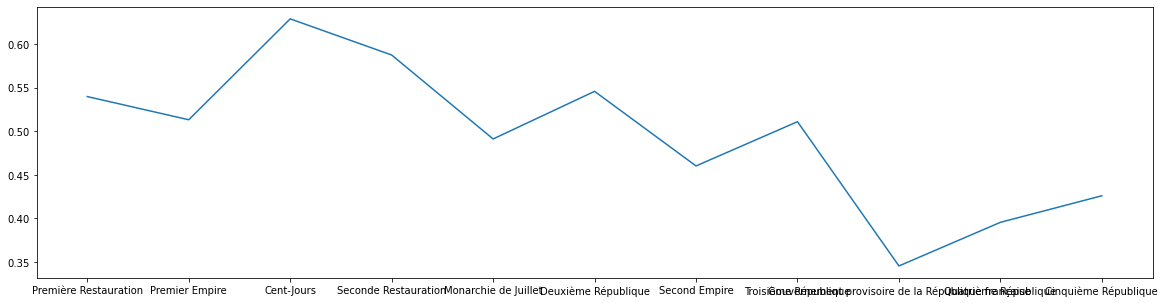

In [38]:
plt.figure(figsize=(20,5))
plt.plot(reg_possible, regterroir)

On a une tendance à la baisse, avec un taux historiquement bas lors de GPRF (où l'on avait d'autres problèmes). Cela mis à part, les deux Républiques succédant à d'autres régimes semblent faire remonter ce taux.

In [39]:
[pcterroir_3, pcterroir_5, pcterroir_emp2]=[[],[],[]]#le pourcentage de députés élus dans leur région de naissance
[date_leg_3, date_leg_5, date_leg_emp2]=[[],[],[]]
def dataparreg (basereg, pcterroir, date_leg) :
    for legislatures in range(len(listeLegislature)):
        if not basereg[basereg['Législature'] ==listeLegislature[legislatures]].empty :
            basedep=basereg[basereg['Législature'] ==listeLegislature[legislatures]]
            pcterroir+=[pourcentageTerroir(basedep)]
            date_leg+=[min(basedep.tail(1)['Date debut mandat']).year]
dataparreg(dept_naiss_3, pcterroir_3, date_leg_3)
dataparreg(dept_naiss_5, pcterroir_5, date_leg_5)
dataparreg(dept_naiss_emp2, pcterroir_emp2, date_leg_emp2)

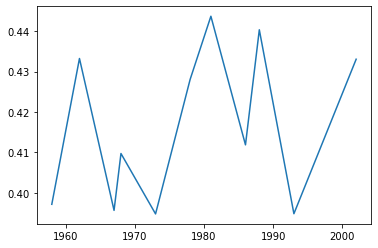

In [40]:
plt.plot(date_leg_5[:11], pcterroir_5[:11])

Pas beaucoup d'effet observable

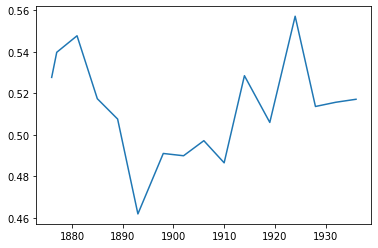

In [46]:
plt.plot(date_leg_3, pcterroir_3)

une chute au moment de l'affaire Dreyfus... Mais surtout des valeurs toujours supérieures à celles de la Cinquième République ! Les temps ont changé, l'ancrage local est devenu moins important entre les deux régimes.

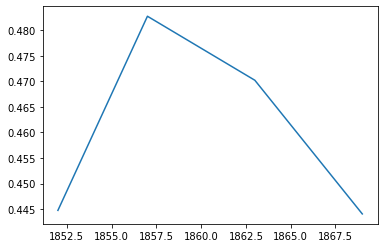

In [47]:
plt.plot(date_leg_emp2, pcterroir_emp2)

Des valeurs très stables et assez faibles (plus niveau de Cinquième que de Quatrième)

Etude des réelections entre différents régimes (attention au changement de nombre de députés ! Plutôt à prendre qualitativement, avec les grandes tendances, que quantitativement).

In [41]:
def Recuplegtrans (transition, premier=True) :
    if premier :
        base_transreg1=dept_naiss[dept_naiss['Régime']==reg_possible[transition]]#on récupère la base du régime voulu
        date_trans1=max(base_transreg1['Date debut mandat'])#on prend la date la plus élevée
    else:
        base_transreg1=dept_naiss[dept_naiss['Régime']==reg_possible[transition+1]]#on récupère la base du régime voulu
        date_trans1=min(base_transreg1['Date debut mandat'])#on prend la date la plus élevée
    leg_trans1=base_transreg1[base_transreg1['Date debut mandat']==date_trans1]['Législature'].unique()#pour récupérer la législature voulue
    base_trans1=base_transreg1[base_transreg1['Législature']==leg_trans1[0]]#et on prend les données des députés de cette dernière législature
    return base_trans1

In [42]:
pctreelec=[]
nbremand=[]
nbredepu=[]
for transition in range(len(reg_possible)-1) :
    base=pd.concat((Recuplegtrans(transition),Recuplegtrans(transition, False)))#on prend la dernière législature du régime précédent et la première du nouveau
    nbremand+=[base['Nom'].count()]
    nbredepu+=[base['Nom'].unique().shape[0]]
    pctreelec+=[float(nbremand[-1])/float(nbredepu[-1])]
print(pctreelec)

[1.3085339168490153, 1.3015873015873016, 1.1948051948051948, 1.136568848758465, 1.2749800159872102, 1.369942196531792, 1.1178992497320472, 1.3638766519823788, 1.096774193548387, 1.4448598130841122]


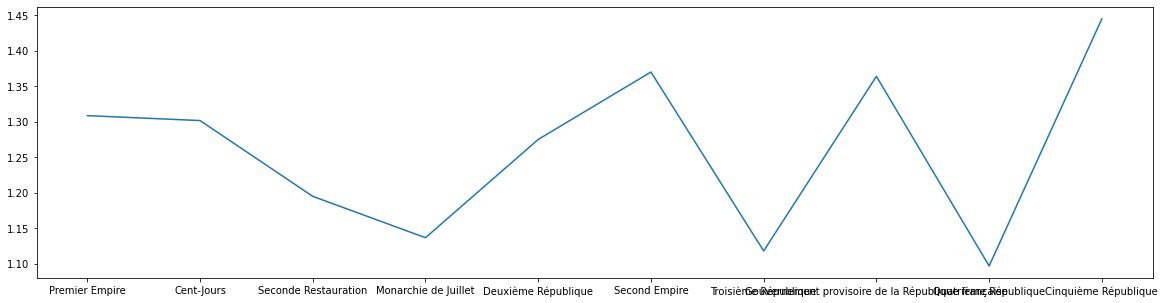

In [43]:
plt.figure(figsize=(20,5))
plt.plot(reg_possible[1:],pctreelec)

A lire comme : la monarchie de Juillet a réélu moins de députés provenant de la seconde restauration que la cinquième république n'a réélu de députés de la Quatrième.
Faits intéressants : la Quatrième République a très peu réélu les députés du GPRF, le Second Empire a beaucoup réélu les députés de la Deuxième République (qui ont plébiscité Napoléon III)

ooooooooooooooooooooooooooooooo

Extension de la base 'député dans le but affiché de faire du clustering dessus

ooooooooooooooooo

In [173]:
df_depu.head(2)

,Unnamed: 0,Nom,Né le,Département de naissance,Département de mort
0,0,Ludovic Pajot,18 novembre 1993,NaN,NaN
1,1,Typhanie Degois,6 janvier 1993,NaN,NaN


In [174]:
age_dep.head(2)

,Département,Groupe,Législature,Mandat,Régime politique,age en année,Date debut mandat
Nom,,,,,,,
Damien Meslot,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.601643,2002-06-19
Damien Meslot,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,42.603696,2007-06-20


In [253]:
nb_mandat=age_dep.groupby("Nom").count()["age en année"]

On compte les mandats par noms puis on joint avec notre liste initiale

In [254]:
nb_mandat=pd.DataFrame(nb_mandat).rename(columns={"age en année":"nombre de mandat"})
nb_mandat.head()

,nombre de mandat
Nom,
"(Louis, Camille, Alexandre, Marie Dubochet",1
"Aaron, Jean-François Crassous",1
Abbas Gueye,1
Abbes Moulessehoul,1
Abdallah Tebib,1


In [255]:
df_depu_b=df_depu.join(nb_mandat,on="Nom",lsuffix=" ")
df_depu_b.sample(5)

,Unnamed: 0,Nom,Né le,Département de naissance,Département de mort,nombre de mandat
16160,16160,Michel Robert,13 avril 1738,Ardennes,Ardennes,1.0
10502,10502,"Louis, René, Désiré Porion",1er août 1805,Somme,Somme,2.0
8218,8218,Ernest Breton,19 avril 1841,Seine-Inférieure,Seine-Maritime,3.0
9103,9103,"Edgar, Adolphe, Louis de Ségur-Lamoignon",19 juillet 1825,Orne,Inconnu,2.0
8482,8482,Henri de Legge,29 juin 1836,Finistère,Inconnu,2.0


In [256]:
age_dep=age_dep.reset_index()

On peut récupèrer l'âge du premier mandat

In [257]:
premier_mandat=age_dep.groupby("Nom")["age en année"].min()
premier_mandat.head()

Nom
(Louis, Camille, Alexandre, Marie Dubochet    45.689254
Aaron, Jean-François Crassous                 49.267625
Abbas Gueye                                   37.470226
Abbes Moulessehoul                            38.811773
Abdallah Tebib                                60.766598
Name: age en année, dtype: float64

In [258]:
premier_mandat_dpt=age_dep.groupby("Nom")[["Département","Nom"]].head(1)

In [259]:
premier_mandat_dpt=pd.DataFrame(premier_mandat_dpt).rename(columns={"Département":"premier dpt"}).set_index("Nom")
premier_mandat_dpt.head()

,premier dpt
Nom,
Damien Meslot,Territoire-de-Belfort
Christine Cloarec-Le Nabour,Ille-et-Vilaine
Pascal Terrasse,Ardèche
Manuel Aeschlimann,Hauts-de-Seine
David Lorion,La Réunion


In [260]:
premier_mandat=pd.DataFrame(premier_mandat).rename(columns={"age en année":"age premier mandat"})
premier_mandat.head()

,age premier mandat
Nom,
"(Louis, Camille, Alexandre, Marie Dubochet",45.689254
"Aaron, Jean-François Crassous",49.267625
Abbas Gueye,37.470226
Abbes Moulessehoul,38.811773
Abdallah Tebib,60.766598


In [261]:
df_depu_b=df_depu_b.join(premier_mandat,on="Nom",lsuffix=" ")
df_depu_b=df_depu_b.join(premier_mandat_dpt,on="Nom",lsuffix=" ")
df_depu_b.sample(10)

,Unnamed: 0,Nom,Né le,Département de naissance,Département de mort,nombre de mandat,age premier mandat,premier dpt
15772,15772,"Nicolas, Charles Bernard-Dutreil",18 mars 1746,Loire-Inférieure,Loire-Atlantique,2.0,64.555784,Loire-Inférieure
3759,3759,Kaddour Sator,14 avril 1911,Paris,Inconnu,1.0,34.817248,Anciens départements d'Algérie
221,221,Sandra Marsaud,2 janvier 1974,NaN,NaN,NaN,NaN,NaN
7230,7230,Henri David,18 avril 1857,Inconnu,Inconnu,2.0,42.012320,Loir-et-Cher
13955,13955,"Joseph, Antoine, Sébastien Guiter",23 février 1761,Hautes-Pyrénées,Paris,4.0,31.039014,Pyrénées-Orientales
15981,15981,"Claude, Charles Prost",10 octobre 1742,Jura,Jura,2.0,49.960301,Jura
5939,5939,Charles Desjardins,24 décembre 1878,Nord,Paris,5.0,40.892539,Aisne
15710,15710,Jean Chanorier,16 novembre 1746,Yvelines,Inconnu,1.0,52.413415,Seine-et-Oise
16351,16351,"Louis, Mathieu Petit",NaN,Inconnu,Inconnu,0.0,NaN,Seine-et-Oise
5176,5176,Armand Pillot,20 décembre 1892,Loire-Inférieure,Paris,1.0,43.203285,Seine


In [263]:
test=df_depu_b[(' '+df_depu_b["Département de naissance"])!=df_depu_b["premier dpt"]]
test=test[~test['age premier mandat'].isna()]
test=test[~(test['Département de naissance']=="Inconnu")]
test.sample(10)

,Unnamed: 0,Nom,Né le,Département de naissance,Département de mort,nombre de mandat,age premier mandat,premier dpt
1463,1463,Roland Chassain,5 février 1947,Cantal,Inconnu,1.0,55.132101,Bouches-du-Rhône
7685,7685,Maurice Lebon,13 novembre 1849,Seine,Seine-Maritime,2.0,41.804244,Seine-Inférieure
1648,1648,Michel Tamaya,19 décembre 1944,La,Inconnu,1.0,52.049281,La Réunion
11664,11664,"Nicolas, Charles, Victor Oudinot Duc de Reggio",27 avril 1767,Meuse,Paris,20.0,12.720055,Maine-et-Loire
4162,4162,Jean Sainteny,29 mai 1907,Paris,Inconnu,1.0,55.493498,Seine
5891,5891,Marcel Fleury,6 août 1879,Calvados,Paris,1.0,54.198494,Orne
4369,4369,"Paul, Jean, Marie, Raymond Estèbe",2 août 1904,Paris,Inconnu,1.0,47.353867,Gironde
8291,8291,Louis de Montfort,3 février 1840,Seine,Seine-Maritime,3.0,49.273101,Seine-Inférieure
2398,2398,Alexis Pota,17 juillet 1932,La,Inconnu,1.0,56.240931,La Réunion
13852,13852,"Pierre, Edouard Lemontey",14 janvier 1762,Paris,Inconnu,1.0,29.232033,Rhône-et-Loire


On s'attaque aux groupes parlementaires !

In [93]:

def Statgroupe (base_dep, mandatgroupe=True):
    nbregrleg=[]#nombre de groupe par législature
    nbremandgr=[]#nombre de mandat par groupe
    date_leg=[]
    for legislature in base_dep['Législature'].unique() :
        baseleg=base_dep[base_dep['Législature']==legislature]
        nbregrleg+=[baseleg['Groupe'].unique().shape[0]]
        if mandatgroupe:
            date_leg+=[min(baseleg['Date debut mandat'].tail(1)).year]
    totgroupe=base_dep['Groupe'].unique().shape[0]
    moydureegr=sum(nbregrleg)/totgroupe#le nombre moyen de législature d'un groupe correspond à la somme du nombre de groupes sur les législatures / le nombre total de groupe
    if mandatgroupe :
        for groupe in base_dep['Groupe'].unique() :
            nbremandgr+=[base_dep[base_dep['Groupe']==groupe]['Groupe'].count()]
        return nbregrleg, nbremandgr, moydureegr, date_leg
                    
    return nbregrleg, moydureegr

In [94]:
(groupeleg_3, mandatgroupe_3, moydureegr_3, date_leg_3)=Statgroupe(dept_naiss_3)
(groupeleg_5, mandatgroupe_5, moydureegr_5, date_leg_5)=Statgroupe(dept_naiss_5)


In [95]:
date_leg_3

[1936,
 1932,
 1928,
 1924,
 1919,
 1914,
 1910,
 1893,
 1898,
 1902,
 1906,
 1889,
 1885,
 1881,
 1877,
 1876,
 1871]

In [77]:
groupeleg_5

[12, 13, 9, 12, 13, 6, 12, 15, 11, 9, 15, 11, 14, 8, 12]

In [78]:
dept_naiss_3[dept_naiss_3['Législature']==' XVIe législature ']['Groupe'].unique().shape[0]

25

In [79]:
dept_naiss[dept_naiss['Régime']=='Seconde Restauration']['Groupe'].unique().shape[0]

88

In [49]:
pluralisme=[]
for regime in reg_possible:
    data=[Statgroupe(dept_naiss[dept_naiss['Régime']==regime], False)]
    nbregrleg =data[0][0]
    dureegroupe=data[0][1]
    pluralisme+=[sum(nbregrleg)/len(nbregrleg)]#on fait une moyenne sur les législatures du nombre de groupes différents

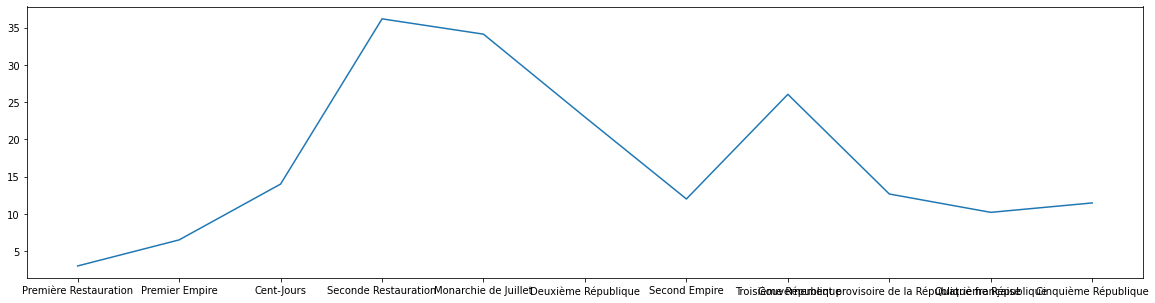

In [50]:
plt.figure(figsize=(20,5))
plt.plot(reg_possible,pluralisme)

In [ ]:
Etonnamment, les régimes ayant le plue de groupes parlementaires ne sont pas des Républiques, mais les monarchies constitutionnelles.

<Figure size 1440x360 with 0 Axes>

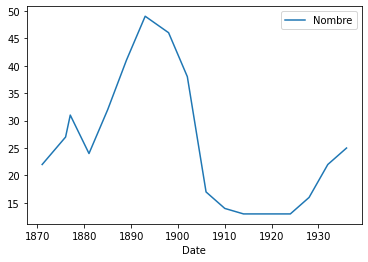

In [123]:
plt.figure(figsize=(20,5))
base=pd.DataFrame([np.array(date_leg_3),np.array(groupeleg_3)], index=['Date','Nombre'])
base=base.sort_values(by=['Date'],axis=1)

base.T.plot(x='Date',y='Nombre')

<Figure size 1440x360 with 0 Axes>

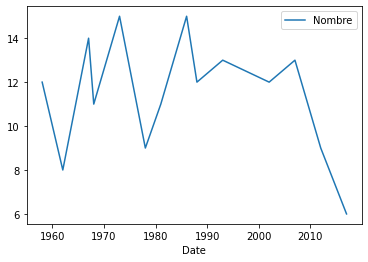

In [124]:
plt.figure(figsize=(20,5))
base=pd.DataFrame([np.array(date_leg_5),np.array(groupeleg_5)], index=['Date','Nombre'])
base=base.sort_values(by=['Date'],axis=1)

base.T.plot(x='Date',y='Nombre')

Un nombre de groupe parlementaire bien moins élevé que dans la Troisième République (connue pour ses interminables querelles de partis) 

Text(0.5, 1.0, 'Les différentes tailles de groupes parlementaires pour la Troisième République')

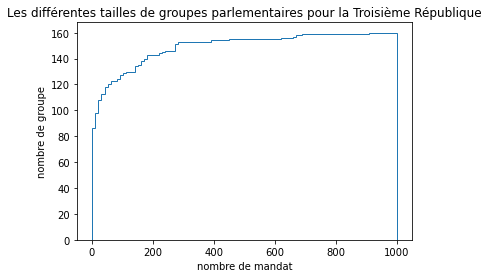

In [170]:
plt.hist(mandatgroupe_3, range=(1, 1000), bins = 100, cumulative=True, histtype='step')
plt.xlabel('nombre de mandat')
plt.ylabel('nombre de groupe')
plt.title('Les différentes tailles de groupes parlementaires pour la Troisième République')

Text(0.5, 1.0, 'Les différentes tailles de groupes parlementaires dans la Troisième République')

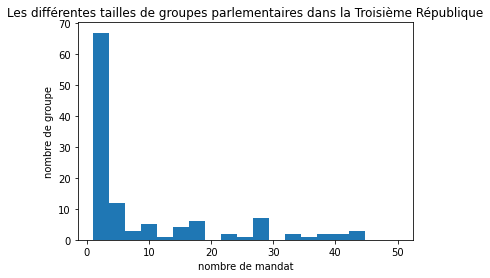

In [164]:
mandat_groupe_3=np.array(mandatgroupe_3)[np.array(mandatgroupe_3) <50 ]
plt.hist(mandat_groupe_3, range=(1, 50), bins = 19)
plt.title('Les différentes tailles de groupes parlementaires')
plt.xlabel('nombre de mandat')
plt.ylabel('nombre de groupe')
plt.title('Les différentes tailles de groupes parlementaires dans la Troisième République')

Text(0.5, 1.0, 'Les différentes tailles de groupes parlementaires dans la Troisième République')

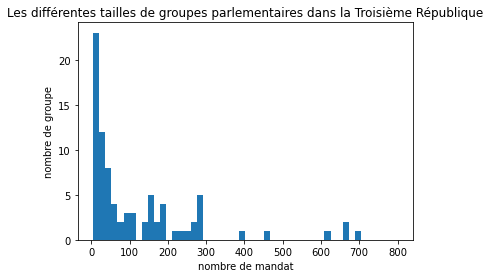

In [158]:
mandat_groupe_3=np.array(mandatgroupe_3)[np.array(mandatgroupe_3) >5]
plt.hist(mandat_groupe_3, range=(5, 800), bins = 50)
plt.title('Les différentes tailles de groupes parlementaires')
plt.xlabel('nombre de mandat')
plt.ylabel('nombre de groupe')
plt.title('Les différentes tailles de groupes parlementaires dans la Troisième République')

In [ ]:
De nombreux groupes parlementaires de la Troisième République ont eu très peu de députés.

Text(0.5, 1.0, 'Les différentes tailles de groupes parlementaires dans la Cinquième République')

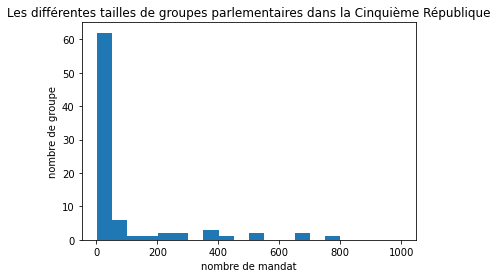

In [129]:
plt.hist(mandatgroupe_5, range=(1, 1000), bins = 20)
plt.xlabel('nombre de mandat')
plt.ylabel('nombre de groupe')
plt.title('Les différentes tailles de groupes parlementaires dans la Cinquième République')

Text(0.5, 1.0, 'Les différentes tailles de groupes parlementaires dans la Cinquième République')

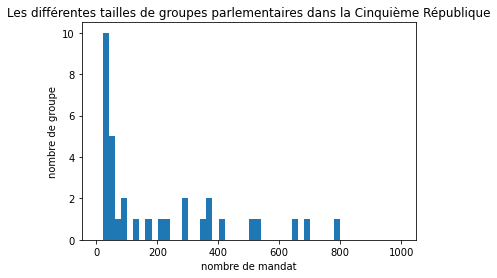

In [147]:
mandat_groupe_5=np.array(mandatgroupe_5)[np.array(mandatgroupe_5) >20 ]
plt.hist(mandat_groupe_5, range=(1, 1000), bins = 50)
plt.title('Les différentes tailles de groupes parlementaires dans la Cinquième République')
plt.xlabel('nombre de mandat')
plt.ylabel('nombre de groupe')
plt.title('Les différentes tailles de groupes parlementaires dans la Cinquième République')